# import packages

In [1]:
%matplotlib inline

In [2]:
import os, glob
import pandas as pd
from sys import stdout
import numpy as np

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [4]:
from IPython.display import Image
import matplotlib.dates as mdates

In [5]:
fs=16
plt.rc("font",size=fs)

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# define parameters

In [7]:
figPath = "/glade/u/home/doubrawa/figs/"

In [8]:
outPath = "/glade/scratch/doubrawa/post_processing/"

In [9]:
inPath = outPath

### define a time

In [10]:
year     = 2015
month    = 3

In [11]:
days = [20,21,28,29,30]

### read in the previously saved pblh

In [12]:
zi_dict = {}

In [13]:
# how wide of a square box should we consider when averaging zi in space? [km]
extent_of_interest_km = 15
# spatial resolution of domain output in x/y [km]
dx_km = 1.0
# which grid points does that correspond to?
extent_of_interest_npts = int(np.round(extent_of_interest_km/dx_km))

In [22]:
for day in days:
    infile = "PBLH_SPATIAL_AVG_{0:.0f}km_by_{0:.0f}km_D02_March{1}.csv".format(extent_of_interest_km,day)
    zi_dict[day] = pd.read_csv(os.path.join(inPath,infile), index_col=0, parse_dates=True)

## plot

In [23]:
colors_days = {20:'#ABB2B9',
               21:'#5DADE2',
               28:'#16A085',
               29:'#D4AC0D',
               30:'#A569BD'}

In [24]:
start = pd.Timestamp('20180606')

In [19]:
# markers = {"MYNN":'s',"YSU":'
#            x','SH':'d'}
# linestyles = {"MYNN":'-',"YSU":':','SH':'--'}

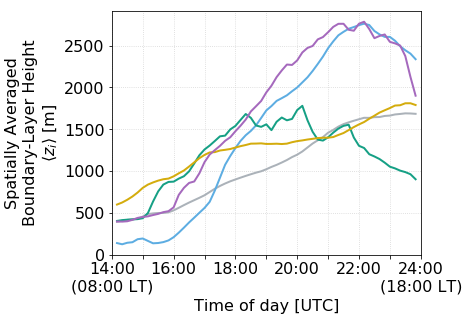

In [25]:
fig = plt.figure(figsize=(6.5,5))
ax  = fig.add_subplot(111)

for day in days:
    
    series = zi_dict[day]["median"]
    deltas = series.index-series.index[0]+pd.Timedelta('14h')
    index  = start+deltas

    ax.plot(index[1:],
            series.values[1:],color=colors_days[day],linestyle='-',lw=2,
            marker='None',label='March {0}'.format(day))

xticks = index[0::6]
xticks = xticks.append(pd.DatetimeIndex([start+pd.Timedelta('24h')]))
ax.set_xticks(xticks)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xticklabels(["14:00\n(08:00 LT)","","16:00","","18:00","","20:00","","22:00","","24:00\n(18:00 LT)"])
ax.set_xlim([xticks[0],xticks[-1]])
ax.set_xlabel("Time of day [UTC]")

ax.grid(color='lightgray',linestyle=':')

ax.set_ylabel("Spatially Averaged\nBoundary-Layer Height\n"+r"$\langle z_i \rangle$ [m]")

fig.subplots_adjust(left=0.22,bottom=0.2,right=0.88)


# # lg = plt.legend(ncol=2,fontsize=12,framealpha=0.2)
# fig.savefig("/glade/u/home/doubrawa/figs/zi_diurnal_cycles.png",dpi=300)

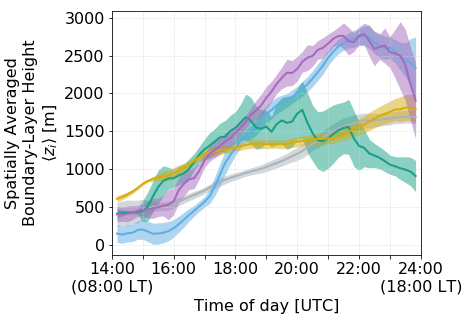

In [32]:
fig = plt.figure(figsize=(6.5,5))
ax  = fig.add_subplot(111)

for day in days:
    
    series = zi_dict[day]["median"]
    stddev = zi_dict[day]["std"]
    deltas = series.index-series.index[0]+pd.Timedelta('14h')
    index  = start+deltas

    ax.fill_between(index[1:],
                    series.values[1:]-stddev.values[1:],
                    series.values[1:]+stddev.values[1:],
                    color=colors_days[day],linestyle='-',lw=0,alpha=0.5,
                    label='March {0}'.format(day))

    ax.plot(index[1:],
            series.values[1:],color=colors_days[day],linestyle='-',lw=2,
            marker='None',label='March {0}'.format(day))    
    
xticks = index[0::6]
xticks = xticks.append(pd.DatetimeIndex([start+pd.Timedelta('24h')]))
ax.set_xticks(xticks)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xticklabels(["14:00\n(08:00 LT)","","16:00","","18:00","","20:00","","22:00","","24:00\n(18:00 LT)"])
ax.set_xlim([xticks[0],xticks[-1]])
ax.set_xlabel("Time of day [UTC]")

ax.grid(color='lightgray',linestyle=':')

ax.set_ylabel("Spatially Averaged\nBoundary-Layer Height\n"+r"$\langle z_i \rangle$ [m]")

fig.subplots_adjust(left=0.22,bottom=0.2,right=0.88)


# # lg = plt.legend(ncol=2,fontsize=12,framealpha=0.2)
fig.savefig("/glade/u/home/doubrawa/figs/zi_diurnal_cycles_with_shading.png",dpi=300)

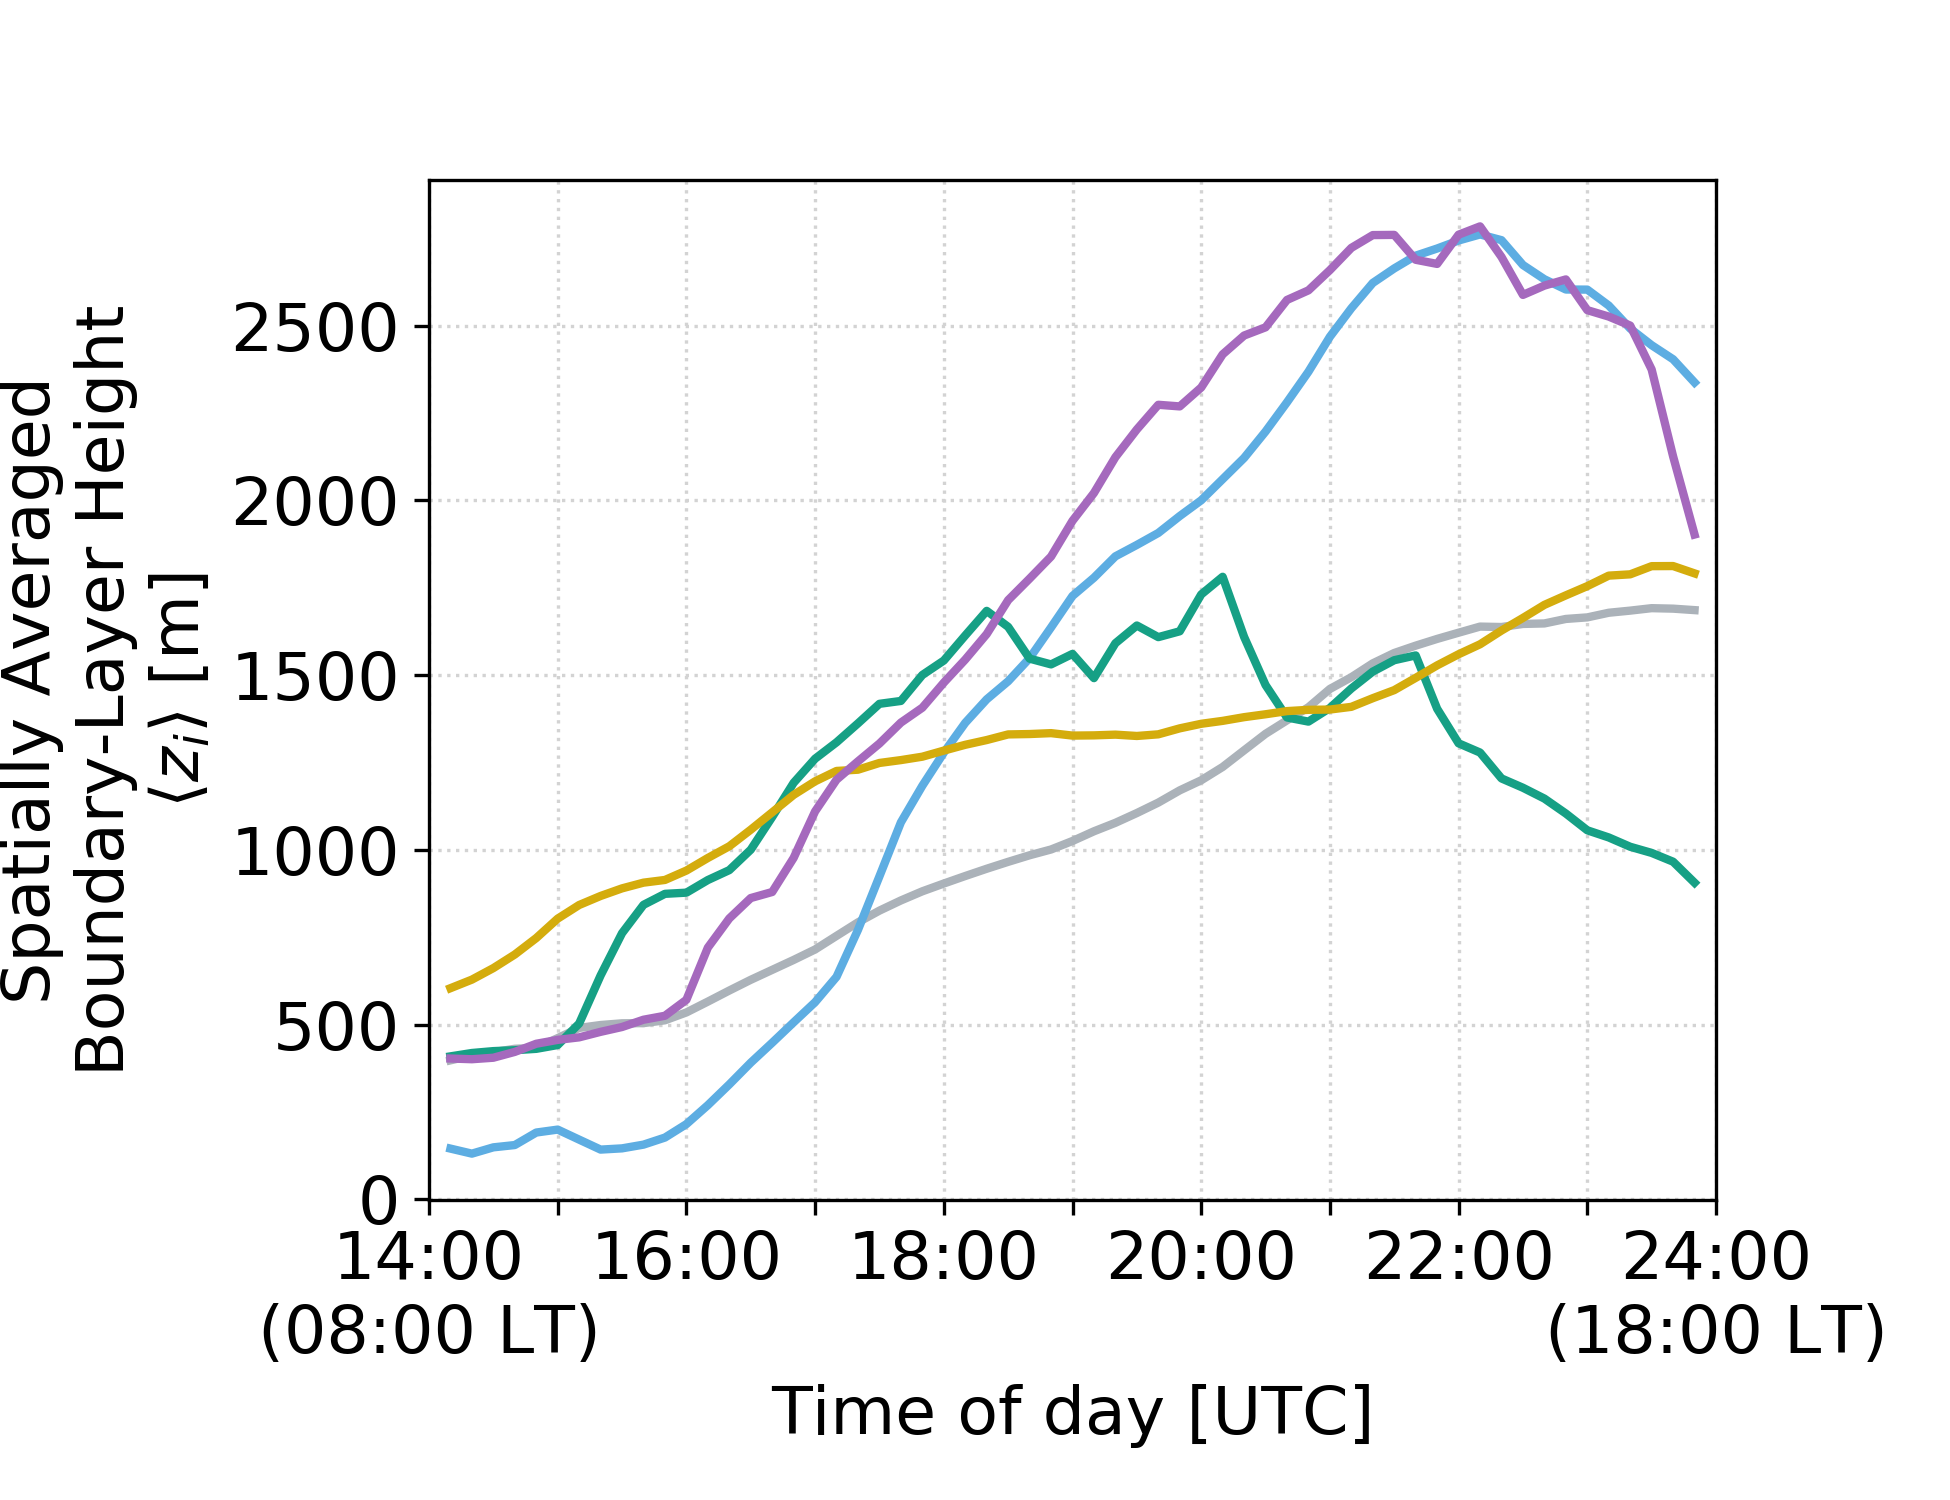

In [23]:
Image("/glade/u/home/doubrawa/figs/zi_diurnal_cycles.png")